### Êú¨ÊñáÊ°£Ëß£ÂÜ≥ÁöÑÈóÆÈ¢òÊòØÔºö
### ‰∏çÂêåÂàÜÂ∏ÉÂú∞ÁÇπÁöÑÂä†Â∑•ÂéÇÂàÜÂà´‰∏é‰ªÄ‰πàÂèòÈáèÁöÑÂÖ≥Á≥ªÊõ¥Â§ß
### È¶ñÂÖàÈÄöËøáÁõ∏ÂÖ≥ÊÄßÂàÜÊûêÂéªÊéâÂÖ±Á∫øÂèòÈáè

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import box,Polygon
from shapely.geometry import box
import analysis_tool as tool

In [4]:
gdfs = tool.load_all_gdfs("origin_data")

‚úÖ  Â∑≤Âä†ËΩΩ 00_Boundaries: Whole area.shp (1 Êù°ËÆ∞ÂΩï, 0.08 MB)
‚úÖ  Â∑≤Âä†ËΩΩ 01_production_farming: farming.shp (1647 Êù°ËÆ∞ÂΩï, 2.90 MB)
‚úÖ  Â∑≤Âä†ËΩΩ 02_production_aquaculture: aquaculture.shp (211 Êù°ËÆ∞ÂΩï, 2.49 MB)
‚úÖ  Â∑≤Âä†ËΩΩ 03_production_livestock: livestock.shp (1538 Êù°ËÆ∞ÂΩï, 1.61 MB)
‚úÖ  Â∑≤Âä†ËΩΩ 04_transformation_industry: processing.shp (58 Êù°ËÆ∞ÂΩï, 0.00 MB)
‚úÖ  Â∑≤Âä†ËΩΩ 05_transformation_energy: energy.shp (147 Êù°ËÆ∞ÂΩï, 0.03 MB)
‚úÖ  Â∑≤Âä†ËΩΩ 06_logistics_transportation: transportation.shp (656 Êù°ËÆ∞ÂΩï, 0.28 MB)
‚úÖ  Â∑≤Âä†ËΩΩ 07_logistics_roads: roads_highways.shp (58252 Êù°ËÆ∞ÂΩï, 6.92 MB)
‚úÖ  Â∑≤Âä†ËΩΩ 08_supply_retail: shop_food_beverage_data.shp (432 Êù°ËÆ∞ÂΩï, 0.01 MB)
‚úÖ  Â∑≤Âä†ËΩΩ 09_supply_public_services: public_services.shp (911 Êù°ËÆ∞ÂΩï, 0.02 MB)
‚úÖ  Â∑≤Âä†ËΩΩ 10_built_environment: buildings.shp (189600 Êù°ËÆ∞ÂΩï, 54.22 MB)
‚úÖ  Â∑≤Âä†ËΩΩ 11_consumption_facilities: consumption_data.shp (2889 Êù°ËÆ∞ÂΩï, 0.08 MB)
‚úÖ  Â∑≤Âä†ËΩΩ 12_consu

In [10]:
def create_square_patch(center_point, half_size):
    x, y = center_point.x, center_point.y
    return box(x - half_size, y - half_size, x + half_size, y + half_size)

# ÂàõÂª∫ patch GeoDataFrame
patch_size = 500  # ÂçäÂæÑ500m ‚Üí patchÂ§ßÂ∞è‰∏∫1000m√ó1000m
patches = gdfs["04_transformation_industry"].copy()
patches["geometry"] = patches.geometry.apply(lambda pt: create_square_patch(pt, patch_size))
patches.reset_index(drop=True, inplace=True)
print(patches)
patches.to_file("processing_data\patch\patches_1000.geojson")

                                           DENOMINAZI                 Type  \
0                              ADRIAGEL ITALIA S.R.L.    Pasta&baked goods   
1                                      Alla Vaccheria                Dairy   
2                                Apicoltura Api Piave  Fruits & Vegetables   
3                                 Apicoltura G di ape  Fruits & Vegetables   
4                            APICOLTURA Miele e Pappa  Fruits & Vegetables   
5                                Apicoltura Montagner  Fruits & Vegetables   
6                                    Az. Agr. Corradi  Fruits & Vegetables   
7            Az.Agr. Vignaluna Di Lunardelli Giovanni               Winery   
8                              Azienda agricola Basso  Fruits & Vegetables   
9            Azienda Agricola Biodinamica San Michele                Dairy   
10                        Azienda Agricola Castellana  Fruits & Vegetables   
11                    Azienda Agricola Gianni Dartora  Fruits & 

In [11]:
# Á©∫Èó¥ËøûÊé•ÔºåÂÇ®Â≠ò‰∏∫ joined_patches
grid = gpd.read_file("processing_data\patch\patches_1000.geojson")
# ËÆ°ÁÆóÈù¢
grid = tool.area_polygons_in_grid(gdfs["01_production_farming"], grid, "farming_area")
grid = tool.area_polygons_in_grid(gdfs["02_production_aquaculture"], grid, "aquaculture_area")
grid = tool.area_polygons_in_grid(gdfs["03_production_livestock"], grid, "pasture_area")
grid = tool.area_polygons_in_grid(gdfs["05_transformation_energy"], grid, "energy_area")
grid = tool.area_polygons_in_grid(gdfs["06_logistics_transportation"], grid, "transportation_area")
grid = tool.area_polygons_in_grid(gdfs["10_built_environment"], grid, "built_area")
grid = tool.area_polygons_in_grid(gdfs["12_consumption_landuse_mix"], grid, "landuse_area")

# ËÆ°ÁÆóÂêÑ‰∏™landuse
gdf_landuse=gdfs["12_consumption_landuse_mix"]
landuse_types = gdf_landuse["landuse"].unique()
for landuse_type in landuse_types:
    sub_gdf = gdf_landuse[gdf_landuse["landuse"] == landuse_type]
    column_name = f"{landuse_type}_area"
    grid = tool.area_polygons_in_grid(sub_gdf, grid, column_name)
# ËÆ°ÁÆóÁÇπ
# grid = tool.count_points_in_grid(gdfs["04_transformation_industry"], grid, "factory_count")
grid = tool.count_points_in_grid(gdfs["08_supply_retail"], grid, "retail_count")
grid = tool.count_points_in_grid(gdfs["09_supply_public_services"], grid, "public_services")
grid = tool.count_points_in_grid(gdfs["11_consumption_facilities"], grid, "consumption_count")
grid = tool.count_points_in_grid(gdfs["13_waste_treatment"], grid, "waste_treatment")

# ËÆ°ÁÆóÁ∫ø
grid = tool.length_lines_in_grid(gdfs["07_logistics_roads"], grid, "road_length")

# ÈÅìË∑Ø‰∫§ÂèâÁÇπ
gdf_intersections = tool.extract_road_intersections(gdfs["07_logistics_roads"])
grid = tool.count_points_in_grid(gdf_intersections, grid, "intersection_count")
# ÂÖ∂‰ªñ
grid.to_file("processing_data\patch\joined_patches_1000.geojson")

  Calculating area for farming_area...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1686/1686 [00:00<00:00, 25698.73it/s]


  Calculating area for aquaculture_area...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 227/227 [00:00<00:00, 6964.63it/s]


  Calculating area for pasture_area...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1556/1556 [00:00<00:00, 40079.94it/s]


  Calculating area for energy_area...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 147/147 [00:00<00:00, 11049.71it/s]


  Calculating area for transportation_area...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 656/656 [00:00<?, ?it/s]


  Calculating area for built_area...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 192718/192718 [00:03<00:00, 58778.22it/s]


  Calculating area for landuse_area...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7211/7211 [00:00<00:00, 50127.58it/s]
g:\CODE\UrbanFood\.venv\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


  Calculating area for farmland_area...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4430/4430 [00:00<00:00, 52584.60it/s]
g:\CODE\UrbanFood\.venv\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


  Calculating area for meadow_area...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 219/219 [00:00<00:00, 29188.20it/s]
g:\CODE\UrbanFood\.venv\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


  Calculating area for residential_area...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1899/1899 [00:00<00:00, 49563.68it/s]
g:\CODE\UrbanFood\.venv\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


  Calculating area for industrial_area...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 301/301 [00:00<00:00, 18467.38it/s]
g:\CODE\UrbanFood\.venv\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


  Calculating area for commercial_area...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 98/98 [00:00<00:00, 24503.24it/s]
g:\CODE\UrbanFood\.venv\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


  Calculating area for retail_area...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 88/88 [00:00<00:00, 7973.62it/s]
g:\CODE\UrbanFood\.venv\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


  Calculating area for construction_area...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 159/159 [00:00<00:00, 38689.70it/s]
g:\CODE\UrbanFood\.venv\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


  Calculating area for recreation_ground_area...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:00<?, ?it/s]
g:\CODE\UrbanFood\.venv\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


  Calculating area for education_area...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4/4 [00:00<00:00, 3999.34it/s]


 Counting points for retail_count...
 Counting points for public_services...
 Counting points for consumption_count...
 Counting points for waste_treatment...
  Calculating total line length for road_length...


ÊèêÂèñ‰∫§ÂèâÂè£: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 58252/58252 [00:12<00:00, 4679.78it/s]


 Counting points for intersection_count...


In [12]:
# ÂΩí‰∏ÄÂåñÔºåÂ≠òÂÇ®Êàê
from sklearn.preprocessing import MinMaxScaler
import numpy as np


joined_grid= gpd.read_file("processing_data\patch\joined_patches_1000.geojson")

cols_to_normalize = [
       'farming_area', 'pasture_area', 'energy_area',
       'transportation_area', 'landuse_area', 'farmland_area',
       'meadow_area', 'residential_area', 'industrial_area', 'commercial_area',
       'retail_area', 'construction_area', 'recreation_ground_area',
       'education_area', 'retail_count', 'public_services',
       'consumption_count', 'waste_treatment', 'road_length',
       'intersection_count', 'aquaculture_area', 'built_area'
]
# ÂΩí‰∏ÄÂåñ
scaler = MinMaxScaler()
grid[[f"{col}_norm" for col in cols_to_normalize]] = scaler.fit_transform(joined_grid[cols_to_normalize])

# ËÆ°ÁÆóÂÜú‰∏öÊ∑∑ÂêàÂ∫¶
production_cols = ['farming_area','aquaculture_area','pasture_area']
norm_cols = [f"{col}_norm" for col in production_cols]
def shannon_entropy_production(row):
    p = row[norm_cols].values
    p = np.array(p, dtype=float)
    if p.sum() == 0:
        return 0
    p = p / p.sum()
    return -np.nansum(p * np.log2(p + 1e-9))
grid['entropy_production'] = grid.apply(shannon_entropy_production, axis=1)

# ËÆ°ÁÆóÁî®Âú∞Ê∑∑ÂêàÂ∫¶
landuse_cols = ['farmland_area',
       'meadow_area', 'residential_area', 'industrial_area', 'commercial_area',
       'retail_area', 'construction_area', 'recreation_ground_area',
       'education_area']
norm_cols_2 = [f"{col}_norm" for col in landuse_cols]
def shannon_entropy_landuse(row):
    p = row[norm_cols_2].values
    p = np.array(p, dtype=float)
    if p.sum() == 0:
        return 0
    p = p / p.sum()
    return -np.nansum(p * np.log2(p + 1e-9))
grid['entropy_landuse'] = grid.apply(shannon_entropy_landuse, axis=1)
print(grid.columns)
# grid = grid[['grid_id','geometry', 'farming_area_norm','aquaculture_area_norm',
#        'pasture_area_norm', 'energy_area_norm', 'transportation_area_norm',
#        'factory_count_norm', 'retail_count_norm', 'public_services_norm',
#        'consumption_count_norm', 'waste_treatment_norm', 'road_length_norm',
#        'intersection_count_norm','built_area_norm',
#        'entropy_production', 'entropy_landuse' ]]
grid = grid[['geometry', 'farming_area_norm','aquaculture_area_norm',
       'pasture_area_norm', 'energy_area_norm', 'transportation_area_norm',
       'retail_count_norm', 'public_services_norm',
       'consumption_count_norm', 'waste_treatment_norm', 'road_length_norm',
       'intersection_count_norm','built_area_norm',
       'entropy_production', 'entropy_landuse' ]]
grid.to_file("processing_data\patch\patches_normalized_1000.geojson")

Index(['DENOMINAZI', 'Type', 'geometry_w', 'Unnamed_ 4', 'lat', 'lon',
       'geometry', 'farming_area', 'aquaculture_area', 'pasture_area',
       'energy_area', 'transportation_area', 'built_area', 'landuse_area',
       'farmland_area', 'meadow_area', 'residential_area', 'industrial_area',
       'commercial_area', 'retail_area', 'construction_area',
       'recreation_ground_area', 'education_area', 'retail_count',
       'public_services', 'consumption_count', 'waste_treatment',
       'road_length', 'intersection_count', 'farming_area_norm',
       'pasture_area_norm', 'energy_area_norm', 'transportation_area_norm',
       'landuse_area_norm', 'farmland_area_norm', 'meadow_area_norm',
       'residential_area_norm', 'industrial_area_norm', 'commercial_area_norm',
       'retail_area_norm', 'construction_area_norm',
       'recreation_ground_area_norm', 'education_area_norm',
       'retail_count_norm', 'public_services_norm', 'consumption_count_norm',
       'waste_treatment_nor

g:\CODE\UrbanFood\.venv\lib\site-packages\geopandas\plotting.py:956: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  ax.figure.canvas.draw_idle()
g:\CODE\UrbanFood\.venv\lib\site-packages\geopandas\plotting.py:956: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  ax.figure.canvas.draw_idle()
g:\CODE\UrbanFood\.venv\lib\site-packages\geopandas\plotting.py:956: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  ax.figure.canvas.draw_idle()
g:\CODE\UrbanFood\.venv\lib\site-packages\geopandas\plotting.py:956: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  ax.figure.canvas.draw_idle()


IndexError: index 12 is out of bounds for axis 0 with size 12

g:\CODE\UrbanFood\.venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  func(*args, **kwargs)
g:\CODE\UrbanFood\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


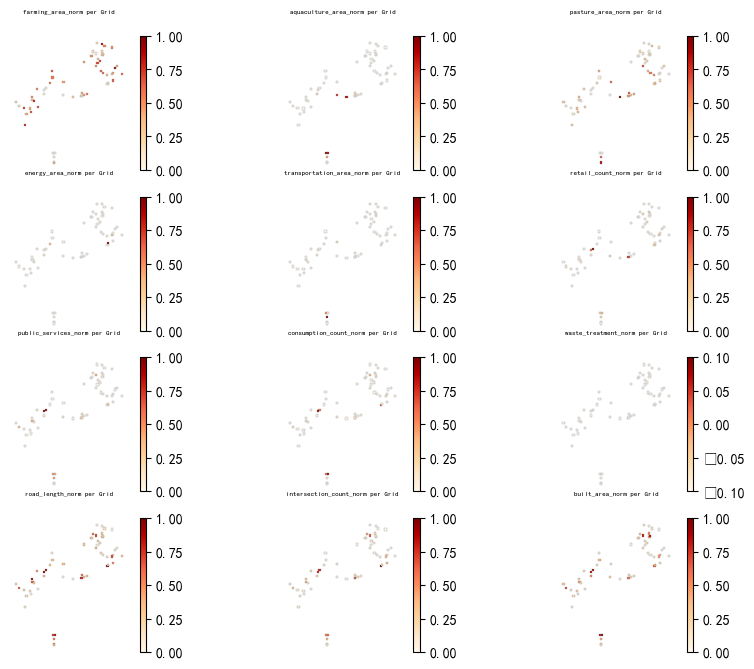

In [13]:
# ÁÉ≠ÂäõÂõæ

patches_map = gpd.read_file("processing_data\patch\patches_normalized_1000.geojson")

variables = ['farming_area_norm','aquaculture_area_norm',
       'pasture_area_norm', 'energy_area_norm', 'transportation_area_norm',
       'retail_count_norm', 'public_services_norm',
       'consumption_count_norm', 'waste_treatment_norm', 'road_length_norm',
       'intersection_count_norm','built_area_norm',
       'entropy_production', 'entropy_landuse']

fig, axs = plt.subplots(4,3, figsize=(10,8))
axs = axs.flatten()
for i, var in enumerate(variables):
    patches_map.plot(column=var, ax=axs[i], cmap='OrRd', legend=True, edgecolor='grey', linewidth=0.2)
    axs[i].set_title(f'{var} per Grid', fontsize=5)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

      farming_area_norm  aquaculture_area_norm  pasture_area_norm  \
0                   0.0                    0.0                0.0   
1                   0.0                    0.0                0.0   
2                   0.0                    0.0                0.0   
3                   0.0                    0.0                0.0   
4                   0.0                    0.0                0.0   
...                 ...                    ...                ...   
3871                0.0                    0.0                0.0   
3872                0.0                    0.0                0.0   
3873                0.0                    0.0                0.0   
3874                0.0                    0.0                0.0   
3875                0.0                    0.0                0.0   

      energy_area_norm  transportation_area_norm  retail_count_norm  \
0                  0.0                       0.0                0.0   
1                  0.0       

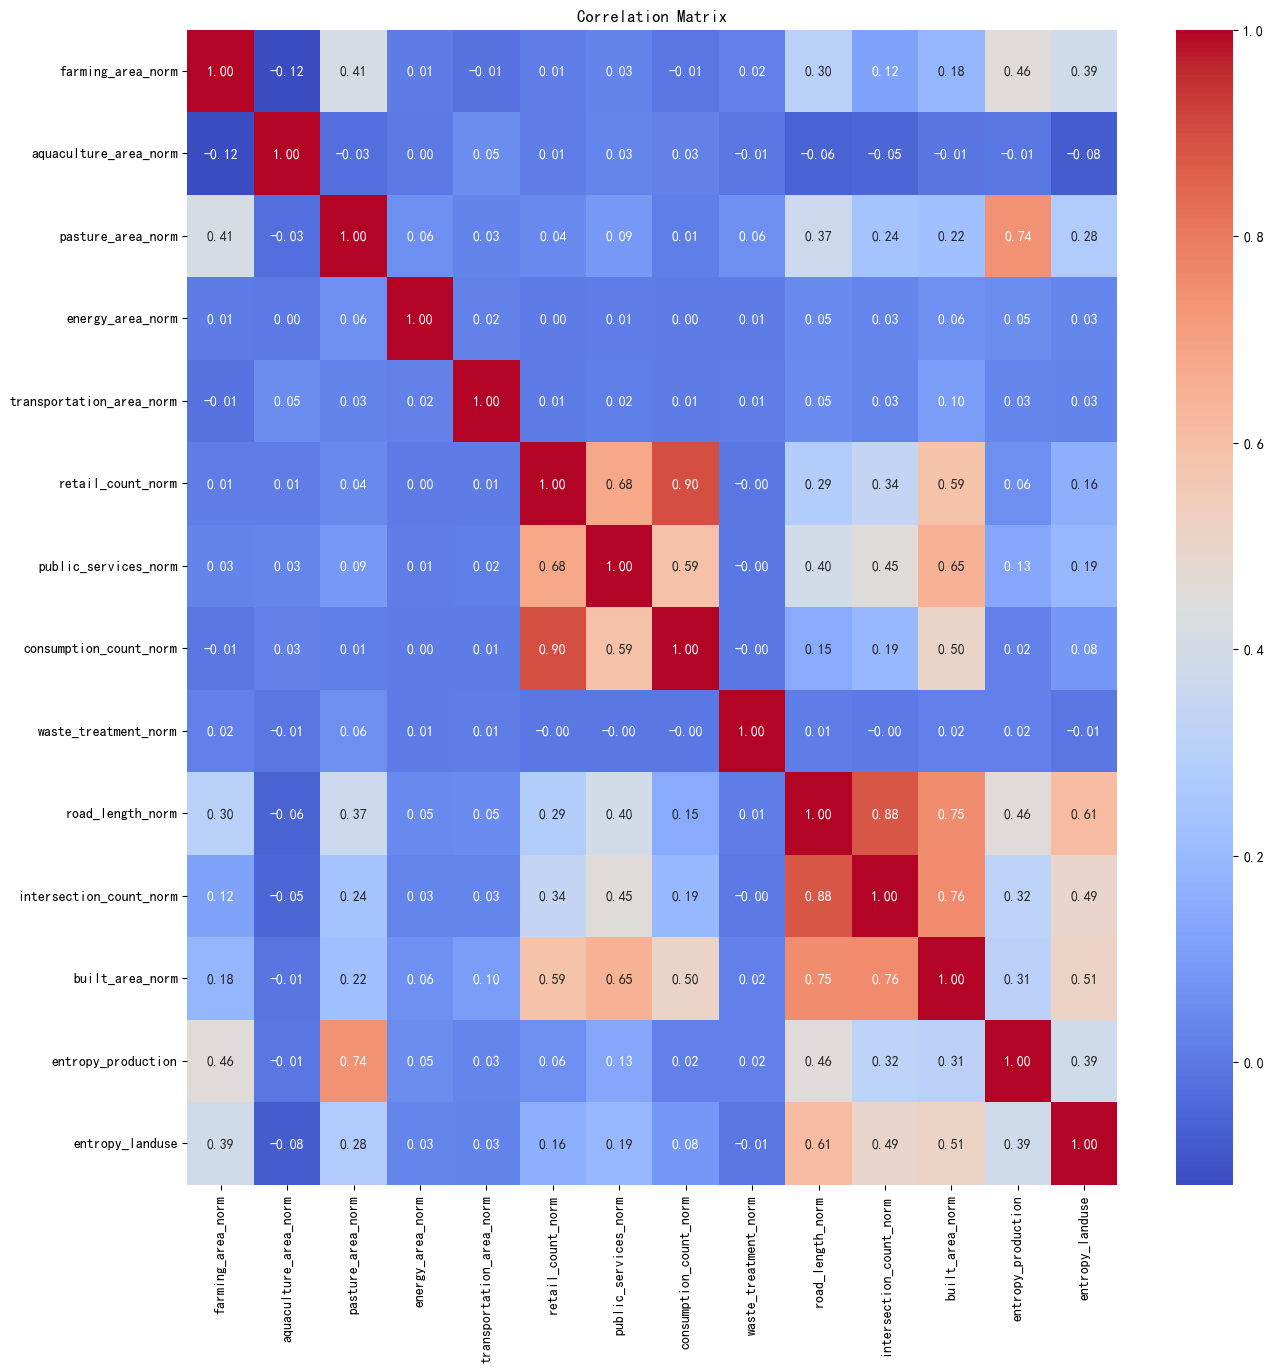

In [14]:
import seaborn as sns
import pandas as pd
patches = gpd.read_file("processing_data\grid\grid_normalized.geojson")

# Âè™ÊèêÂèñÈúÄË¶ÅÂàÜÊûêÁöÑÂ≠óÊÆµ
df_analysis = patches[['farming_area_norm','aquaculture_area_norm',
       'pasture_area_norm', 'energy_area_norm', 'transportation_area_norm',
       'retail_count_norm', 'public_services_norm',
       'consumption_count_norm', 'waste_treatment_norm', 'road_length_norm',
       'intersection_count_norm','built_area_norm',
       'entropy_production', 'entropy_landuse']]
print(df_analysis)
# ËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄßÁü©Èòµ
corr_matrix = df_analysis.corr()
corr_matrix.to_csv("correlation_matrix.csv")
# ÁÉ≠ÂäõÂõæÂèØËßÜÂåñ
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### ÈÄöËøáËÆ°ÁÆóVIFÊéíÈô§ÂÖ±Á∫øÊÄßÂèòÈáè

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import numpy as np

# Ê†áÂáÜÂåñÂèòÈáèÔºàÈùûÂøÖÈ°ª‰ΩÜÊé®ËçêÔºâ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_analysis.dropna())  # ÂéªÈô§ NaN ÂΩ±Âìç

# ÈáçÊñ∞ÊûÑÂª∫‰∏∫ DataFrame
X_df = pd.DataFrame(X_scaled, columns=df_analysis.columns)

# ËÆ°ÁÆó VIF
vif_df = pd.DataFrame()
vif_df["Variable"] = X_df.columns
vif_df["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

# vif_df.to_csv("vif_result.csv", index=False)
print(vif_df)

# Ê†πÊçÆÁªìËÆ∫Ôºö
# consumption_count ‰∏é retail_countÔºåpublic_servicesÔºå built_area
#

                    Variable       VIF
0          farming_area_norm  1.502820
1      aquaculture_area_norm  1.028929
2          pasture_area_norm  2.287177
3           energy_area_norm  1.010792
4   transportation_area_norm  1.030786
5          retail_count_norm  6.519733
6       public_services_norm  2.311633
7     consumption_count_norm  5.821326
8       waste_treatment_norm  1.007129
9           road_length_norm  6.720643
10   intersection_count_norm  5.644349
11           built_area_norm  4.673453
12        entropy_production  2.564118
13           entropy_landuse  1.810429


#  GWRÂàÜÊûê
## Âú®ËøõË°åÂàÜÊûê‰πãÂâçÔºåÈ¶ñÂÖàÊúâOLSÂõûÂΩíÊ®°ÂûãÁöÑÂàÜÊûê

In [16]:
# patches = gpd.read_file("processing_data/patch/patches_normalized_1000.geojson")
patches = gpd.read_file("processing_data\grid\grid_normalized.geojson")
print(patches.columns)

Index(['grid_id', 'farming_area_norm', 'aquaculture_area_norm',
       'pasture_area_norm', 'energy_area_norm', 'transportation_area_norm',
       'factory_count_norm', 'retail_count_norm', 'public_services_norm',
       'consumption_count_norm', 'waste_treatment_norm', 'road_length_norm',
       'intersection_count_norm', 'built_area_norm', 'entropy_production',
       'entropy_landuse', 'geometry'],
      dtype='object')


## Á≠õÈÄâÊúâÊïàÁΩëÊ†ºËøõË°åÂàÜÊûê

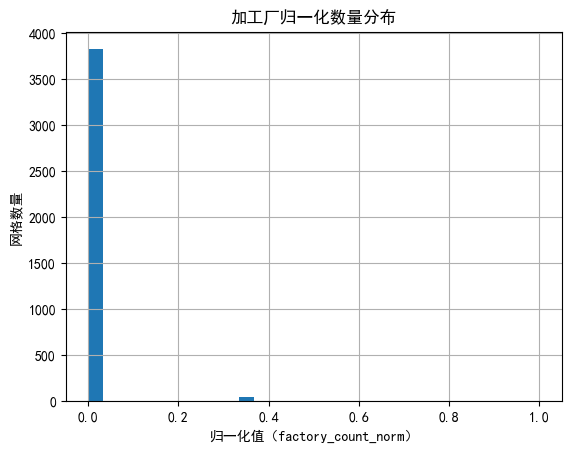

factory_count_norm
0.000000    0.985810
0.333333    0.013158
0.666667    0.000774
1.000000    0.000258
Name: proportion, dtype: float64


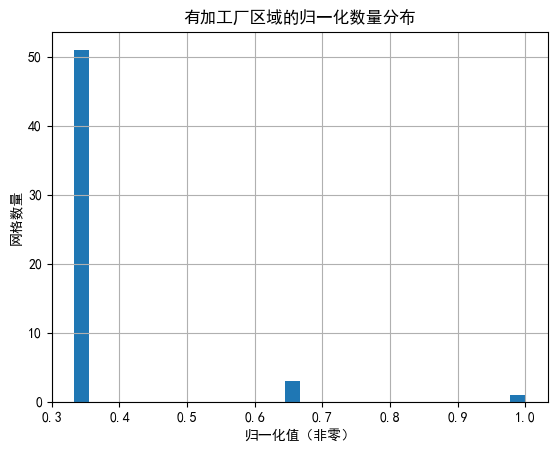

In [17]:
# Êü•ÁúãÂ§öÂ∞ëÁΩëÊ†ºÂä†Â∑•ÂéÇÊï∞Èáè‰∏∫Èõ∂

import geopandas as gpd

patches = gpd.read_file("processing_data/grid/grid_normalized.geojson")

import matplotlib.pyplot as plt

patches['factory_count_norm'].hist(bins=30)
plt.title('Âä†Â∑•ÂéÇÂΩí‰∏ÄÂåñÊï∞ÈáèÂàÜÂ∏É')
plt.xlabel('ÂΩí‰∏ÄÂåñÂÄºÔºàfactory_count_normÔºâ')
plt.ylabel('ÁΩëÊ†ºÊï∞Èáè')
plt.grid(True)
plt.show()

# Êü•Áúã‰∏çÂêåÂÄºÂá∫Áé∞ÁöÑÈ¢ëÁéáÔºàÂâç10Ë°åÔºâ
value_counts = patches['factory_count_norm'].value_counts(normalize=True).sort_index()
print(value_counts.head(10))

non_zero = patches[patches['factory_count_norm'] > 0]
non_zero['factory_count_norm'].hist(bins=30)
plt.title('ÊúâÂä†Â∑•ÂéÇÂå∫ÂüüÁöÑÂΩí‰∏ÄÂåñÊï∞ÈáèÂàÜÂ∏É')
plt.xlabel('ÂΩí‰∏ÄÂåñÂÄºÔºàÈùûÈõ∂Ôºâ')
plt.ylabel('ÁΩëÊ†ºÊï∞Èáè')
plt.grid(True)
plt.show()


In [18]:
# ‰øùÁïôÊúâÂ∑•ÂéÇÁöÑ/ÈÇªËøëÁöÑÁΩëÊ†º

import geopandas as gpd

patches = gpd.read_file("processing_data/grid/grid_normalized.geojson")

# ‰øùÁïôÊúâÂ∑•ÂéÇÁöÑÁΩëÊ†ºÔºàÂΩí‰∏ÄÂåñÂÄº > 0Ôºâ
patches_with_factory = patches[patches['factory_count_norm'] > 0].copy()

# ‰øùÂ≠ò‰ª•Â§áÊ£ÄÊü•
patches_with_factory.to_file("processing_data/grid/patches_with_factory_only.geojson")

print(f"‚úÖ ÊúâÊïàÁΩëÊ†ºÊï∞ÈáèÔºàÂåÖÂê´Â∑•ÂéÇÔºâ: {len(patches_with_factory)}")

# ÂàõÂª∫ 1000 Á±≥ÁºìÂÜ≤Âå∫
buffer = patches_with_factory.buffer(1000)

# ÂêàÂπ∂‰∏∫‰∏Ä‰∏™Â§ßÂå∫Âùó
buffer_union = buffer.unary_union

# ÊâæÂá∫ÊâÄÊúâÂú®ÁºìÂÜ≤Âå∫ÂÜÖÁöÑÁΩëÊ†º
patches_in_buffer = patches[patches.geometry.centroid.within(buffer_union)].copy()

# ‰øùÂ≠òÁªìÊûú
patches_in_buffer.to_file("processing_data/grid/patches_with_factory_and_neighbors.geojson")

print(f"‚úÖ ÁºìÂÜ≤Âå∫ÂÜÖÊÄªÁΩëÊ†ºÊï∞Èáè: {len(patches_in_buffer)}")



‚úÖ ÊúâÊïàÁΩëÊ†ºÊï∞ÈáèÔºàÂåÖÂê´Â∑•ÂéÇÔºâ: 55


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19640\3502916642.py:19: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer_union = buffer.unary_union


‚úÖ ÁºìÂÜ≤Âå∫ÂÜÖÊÄªÁΩëÊ†ºÊï∞Èáè: 375


## ÊòæËëóÊÄßÊ£ÄÈ™åÔºàMoran‚Äôs IÔºâÊòØÂê¶ÊúâÂøÖË¶ÅGWR

In [19]:
# ÊòæËëóÊÄßÊ£ÄÈ™åÔºàMoran‚Äôs IÔºâÔºö
#     GWR ÂâçÊèêÊòØÂèòÈáè‰∏éÁõÆÊ†á‰πãÈó¥Âú®Á©∫Èó¥‰∏äÂ≠òÂú®‚ÄúÂ±ÄÈÉ®ÂºÇË¥®ÊÄß‚Äù;
#     Ëã• Moran‚Äôs I ÊòæËëó‰∏∫Ê≠£ ‚Üí ÊîØÊåÅ GWR ÂêàÁêÜÊÄßÔºàÂ¶ÇÂêå Chen ËÆ∫Êñá‰∏≠ÊÆãÂ∑ÆÁöÑÁ©∫Èó¥Ëá™Áõ∏ÂÖ≥Ê£ÄÈ™åÔºâ

from esda.moran import Moran
from libpysal.weights import KNN
w = KNN.from_dataframe(patches, k=8)
moran = Moran(patches['factory_count_norm'], w)
print(moran.I, moran.p_sim)

# ÁªìÊûúËØ¥ÊòéÔºöMoran‚Äôs IÊ≠£ÂÄºÔºåËØ¥ÊòéÁ©∫Èó¥‰∏äÂ≠òÂú®ËΩªÂ∫¶ÁöÑÊ≠£Áõ∏ÂÖ≥ÊÄßÔºàÂç≥‚ÄúËÅöÈõÜ‚ÄùÔºâ
# p_sim=0.001ÔºåÈùûÂ∏∏ÊòæËëóÔºàp < 0.01ÔºâÔºåËØ¥ÊòéËøôÁßçÁ©∫Èó¥ËÅöÈõÜÂπ∂ÈùûÂÅ∂ÁÑ∂

# ‚úÖ ÁªìËÆ∫
# ‰Ω†ÂΩìÂâçÁöÑÁõÆÊ†áÂèòÈáè factory_count_norm Âú®Á©∫Èó¥‰∏äÂÖ∑ÊúâÊòæËëóÁöÑÊ≠£ÂêëÁ©∫Èó¥Ëá™Áõ∏ÂÖ≥ÊÄß„ÄÇ
# ‚úÖ Â∑•ÂéÇÊï∞ÈáèÂú®Á©∫Èó¥‰∏ä‚ÄúÊúâËÅöÈõÜË∂ãÂäø‚ÄùÔºåËÄå‰∏çÊòØÂÆåÂÖ®ÈöèÊú∫Ôºõ
# ‚úÖ ‰ΩøÁî® Âú∞ÁêÜÂä†ÊùÉÂõûÂΩíÔºàGWRÔºâÊòØÂêàÁêÜ‰∏îÊúâÂøÖË¶ÅÁöÑÔºõ
# ‚ö†Ô∏è ËôΩÁÑ∂Êï¥‰ΩìËÅöÈõÜÊÄß‰∏çÂº∫ÔºàI ‚âà 0.05ÔºâÔºå‰ΩÜÊòæËëóÊÄßÈ´òÔºåËØ¥ÊòéÊüê‰∫õÂ±ÄÈÉ®Á°ÆÂÆûÂ≠òÂú®Â∑•ÂéÇËÅöÈõÜ‚ÄúÁÉ≠ÁÇπÂå∫Âüü‚ÄùÔºõ
# ‚úÖ GWR Ê≠£ÊòØ‰∏∫‰∫ÜÊè≠Á§∫ËøôÁßç‚Äú‰∏çÂêåÂú∞ÁÇπÂΩ±ÂìçÂõ†Á¥†‰∏ç‰∏ÄÊ†∑‚ÄùÁöÑÁé∞Ë±°ËÆæËÆ°ÁöÑ„ÄÇ

0.05022107510019164 0.001


## OLS & GWR Âª∫Ê®°

In [21]:
import geopandas as gpd
import pandas as pd
import numpy as np
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# === 1. Âä†ËΩΩÊï∞ÊçÆ ===
patches = gpd.read_file("processing_data\grid\patches_with_factory_and_neighbors.geojson")

print(patches.columns)

# === 2. ÈÄâÊã©ÂèòÈáè & ÂéªÈô§ÂÖ±Á∫øÂèòÈáè ===
selected_vars = ['farming_area_norm','aquaculture_area_norm','pasture_area_norm','energy_area_norm',
                 'transportation_area_norm','retail_count_norm','public_services_norm',
                 'road_length_norm','built_area_norm','entropy_production','entropy_landuse']
# X_raw = patches[selected_vars].dropna()
# y = patches['factory_count_norm'].values.reshape(-1, 1) # ÊõøÊç¢‰∏∫‰Ω†ÁúüÂÆûÁöÑÁõÆÊ†áÂèòÈáèÂàóÂêç
# # y = np.ones((X_raw.shape[0], 1))

X_raw = patches[selected_vars]
y_raw = patches['factory_count_norm']

mask = X_raw.notnull().all(axis=1) & y_raw.notnull()
X_raw = X_raw[mask]
y = y_raw[mask].values.reshape(-1, 1)

# === 3. Ê†áÂáÜÂåñÂèòÈáèÔºàÊé®ËçêÔºâ ===
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)
# y = y.values.reshape(-1, 1)

# === 4. OLS ÂõûÂΩí ===
X_ols = sm.add_constant(X)
ols_model = sm.OLS(y, X_ols).fit()
print("=== OLS Ê®°ÂûãÁªìÊûú ===")
print(ols_model.summary())

# === 5. GWR ÂáÜÂ§áÂùêÊ†á ===
# coords = np.array([(geom.centroid.x, geom.centroid.y) for geom in patches.loc[X_raw.index].geometry])
# coords = np.array([[geom.x, geom.y] for geom in  patches.geometry.centroid])
coords = np.array([(geom.centroid.x, geom.centroid.y) for geom in patches.geometry[mask]])

# === 6. ÈÄâÊã©ÊúÄ‰ºòÂ∏¶ÂÆΩ ===
selector = Sel_BW(coords, y, X)
bw = selector.search(bw_min=2, bw_max=100)
print(f"‚úÖ GWR ÊúÄ‰ºòÂ∏¶ÂÆΩ: {bw}")


# === 7. ÊãüÂêà GWR Ê®°Âûã ===
gwr_model = GWR(coords, y, X, bw)
gwr_results = gwr_model.fit()

# === 8. ËæìÂá∫ÊØîËæÉÊåáÊ†á ===
print("\n=== Ê®°ÂûãÊåáÊ†áÂØπÊØî ===")
print(f"GWR AICc : {gwr_results.aicc:.4f}")   # Êîπ‰∏∫Â∞èÂÜô aicc
print(f"OLS AIC  : {ols_model.aic:.4f}")
print(f"GWR R2   : {gwr_results.R2:.4f}")
print(f"OLS R2   : {ols_model.rsquared:.4f}")


# === 9. ËæìÂá∫ÊØè‰∏™ÁÇπÁöÑÂõûÂΩíÁ≥ªÊï∞Ë°® ===
beta_df = pd.DataFrame(gwr_results.params, columns=["Intercept"] + selected_vars)
beta_df["R2_local"] = gwr_results.localR2
beta_df.to_csv("gwr_coefficients.csv", index=False)

# === 10. Ëã•ÈúÄË¶ÅÂêàÂπ∂Âà∞ GeoDataFrame ÂèØËßÜÂåñ ===
patches_gwr = patches.loc[X_raw.index].copy()
for i, var in enumerate(["Intercept"] + selected_vars):
    patches_gwr[f'beta_{var}'] = gwr_results.params[:, i]
patches_gwr["R2_local"] = gwr_results.localR2
patches_gwr.to_file("patches_with_gwr.geojson", driver="GeoJSON")

print(patches_gwr.columns)



Index(['grid_id', 'farming_area_norm', 'aquaculture_area_norm',
       'pasture_area_norm', 'energy_area_norm', 'transportation_area_norm',
       'factory_count_norm', 'retail_count_norm', 'public_services_norm',
       'consumption_count_norm', 'waste_treatment_norm', 'road_length_norm',
       'intersection_count_norm', 'built_area_norm', 'entropy_production',
       'entropy_landuse', 'geometry'],
      dtype='object')
=== OLS Ê®°ÂûãÁªìÊûú ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.870
Date:                Thu, 05 Jun 2025   Prob (F-statistic):            0.00126
Time:                        10:16:40   Log-Likelihood:                 231.77
No. Observations:                 375   AIC:                            -4

### ËæìÂá∫ OLS Ê†áÂáÜÂåñÂõûÂΩíÁ≥ªÊï∞ÔºàSCÔºâ+ pÂÄº + R¬≤

In [22]:
# ËæìÂá∫ OLS Ê†áÂáÜÂåñÂõûÂΩíÁ≥ªÊï∞ÔºàSCÔºâ+ pÂÄº + R¬≤ Ë°®Ê†º
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# ÂáÜÂ§áÊï∞ÊçÆ
X = X_raw.copy()
y = y_raw.copy()

# Ê†áÂáÜÂåñXÂíåy
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1)).flatten()

# OLSÊ®°ÂûãÊãüÂêàÔºàÊ†áÂáÜÂåñÊï∞ÊçÆÔºâ
X_ols = sm.add_constant(X_scaled)
ols_model = sm.OLS(y_scaled, X_ols).fit()

# ËæìÂá∫Ê†áÂáÜÂåñÂõûÂΩíÁ≥ªÊï∞ÔºàSCÔºâ+ pÂÄºË°®Ê†º
sc_results = pd.DataFrame({
    'Variable': ['Intercept'] + list(X.columns),
    'Standardized Coef (SC)': ols_model.params,
    'p-value': ols_model.pvalues
})

# Ê∑ªÂä†Adjusted R¬≤ Âà∞Ë°®Ê†º
adjusted_r2 = ols_model.rsquared_adj
sc_results['Adjusted R¬≤'] = [adjusted_r2] + [''] * (len(sc_results)-1)

print("‚úÖ OLSÊ†áÂáÜÂåñÂõûÂΩíÁ≥ªÊï∞ÔºàSCÔºâ+ pÂÄº + Adjusted R¬≤ ÁªìÊûúË°®Ê†º:")
print(sc_results)

# ‰øùÂ≠ò‰∏∫CSV
sc_results.to_csv("ols_SC_pvalue_r2.csv", index=False)


‚úÖ OLSÊ†áÂáÜÂåñÂõûÂΩíÁ≥ªÊï∞ÔºàSCÔºâ+ pÂÄº + Adjusted R¬≤ ÁªìÊûúË°®Ê†º:
                    Variable  Standardized Coef (SC)   p-value Adjusted R¬≤
0                  Intercept           -8.196568e-17  1.000000    0.052124
1          farming_area_norm            5.113939e-02  0.396674            
2      aquaculture_area_norm            5.757688e-03  0.920678            
3          pasture_area_norm           -1.072621e-02  0.876367            
4           energy_area_norm           -5.166964e-02  0.308780            
5   transportation_area_norm            1.061984e-01  0.039176            
6          retail_count_norm            7.949510e-02  0.241484            
7       public_services_norm            4.767986e-02  0.513195            
8           road_length_norm           -2.091998e-01  0.023375            
9            built_area_norm            2.047125e-01  0.028325            
10        entropy_production            9.583607e-02  0.169940            
11           entropy_landus

### Ëá™Âä®ÂèòÈáèÁªÑÂêàÁ≠õÈÄâ

In [23]:
# Ëá™Âä®ËøõË°åÂèòÈáèÁªÑÂêàÁ≠õÈÄâÔºåÂπ∂ËæìÂá∫Ë°®Áé∞ÊåáÊ†áË°®Ê†º
import itertools
import warnings
warnings.filterwarnings('ignore')  # ÊäëÂà∂ÂèØËÉΩÁöÑË≠¶Âëä

# Â≠òÂÇ®ÁªìÊûúÁöÑDataFrame
comb_results = []

variables = X.columns.tolist()

# ÈÅçÂéÜ2Âà∞len(variables)‰∏™ÂèòÈáèÁöÑÊâÄÊúâÁªÑÂêà
for r in range(2, len(variables)+1):
    for var_comb in itertools.combinations(variables, r):

        X_subset = X[list(var_comb)]

        # Ê†áÂáÜÂåñ
        X_scaled_subset = scaler_X.fit_transform(X_subset)
        X_ols_subset = sm.add_constant(X_scaled_subset)

        # ÊãüÂêàÊ®°Âûã
        model_subset = sm.OLS(y_scaled, X_ols_subset).fit()

        # Â≠òÂÇ®ÁªÑÂêàÁöÑË°®Áé∞ÊåáÊ†á
        comb_results.append({
            'Variables': ', '.join(var_comb),
            'Adjusted R¬≤': model_subset.rsquared_adj,
            'AIC': model_subset.aic
        })

# ÂàõÂª∫DataFrameÂπ∂ÊéíÂ∫è
comb_results_df = pd.DataFrame(comb_results)
comb_results_df.sort_values(by='Adjusted R¬≤', ascending=False, inplace=True)

# ÊâìÂç∞Âπ∂‰øùÂ≠ò
print("‚úÖ Ëá™Âä®ÂèòÈáèÁªÑÂêàÁ≠õÈÄâÁªìÊûúÔºàÂâç10‰∏™ÊúÄ‰Ω≥ÁªÑÂêàÔºâ:")
print(comb_results_df.head(10))

comb_results_df.to_csv("variable_combination_results.csv", index=False)


‚úÖ Ëá™Âä®ÂèòÈáèÁªÑÂêàÁ≠õÈÄâÁªìÊûúÔºàÂâç10‰∏™ÊúÄ‰Ω≥ÁªÑÂêàÔºâ:
                                              Variables  Adjusted R¬≤  \
1800  energy_area_norm, transportation_area_norm, re...     0.059381   
1471  transportation_area_norm, retail_count_norm, r...     0.059301   
1920  farming_area_norm, energy_area_norm, transport...     0.058674   
1681  farming_area_norm, transportation_area_norm, r...     0.058589   
1968  energy_area_norm, transportation_area_norm, re...     0.057874   
1803  transportation_area_norm, retail_count_norm, p...     0.057705   
1801  energy_area_norm, transportation_area_norm, pu...     0.057247   
2013  farming_area_norm, energy_area_norm, transport...     0.057228   
1472  transportation_area_norm, public_services_norm...     0.057093   
1923  farming_area_norm, transportation_area_norm, r...     0.057050   

              AIC  
1800  1050.162434  
1471  1049.214490  
1920  1051.420626  
1681  1050.477907  
1968  1051.739394  
1803  1050.829735  
1801

### Â±ÄÈÉ®ÂõûÂΩíÁ≥ªÊï∞ÁªòÂõæ1ÔºàÂ∫üÔºâ

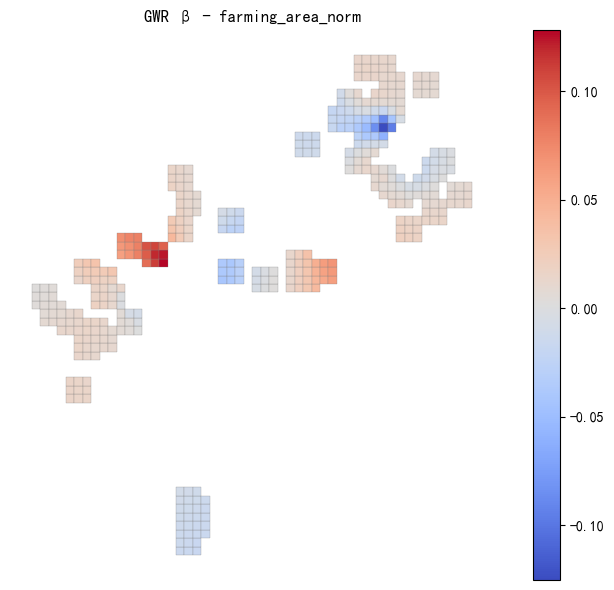

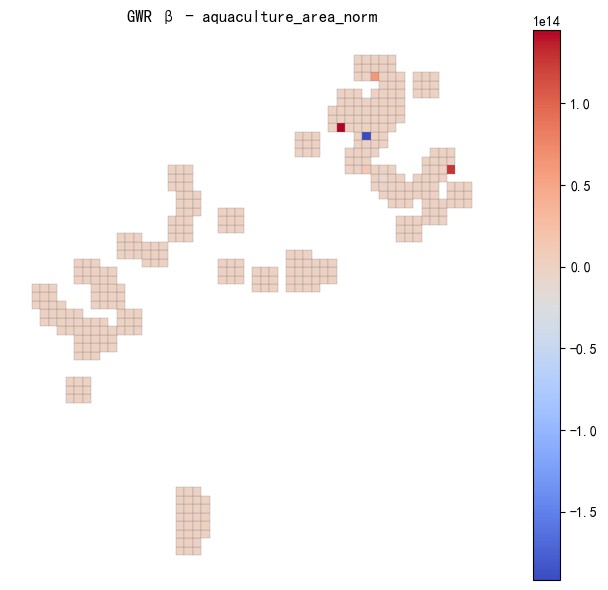

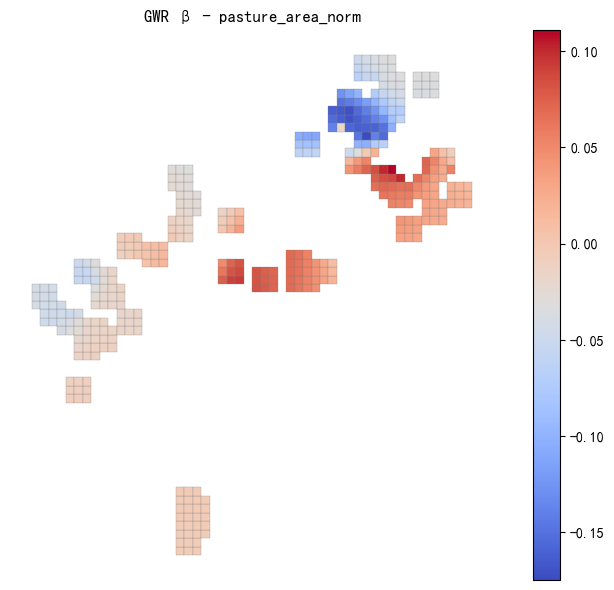

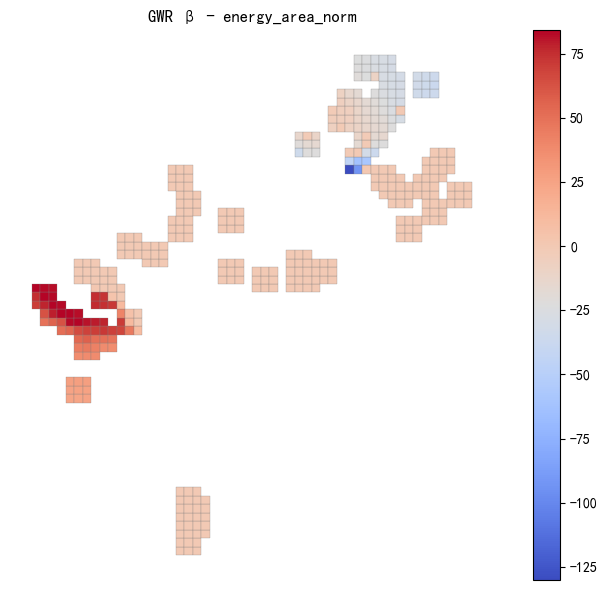

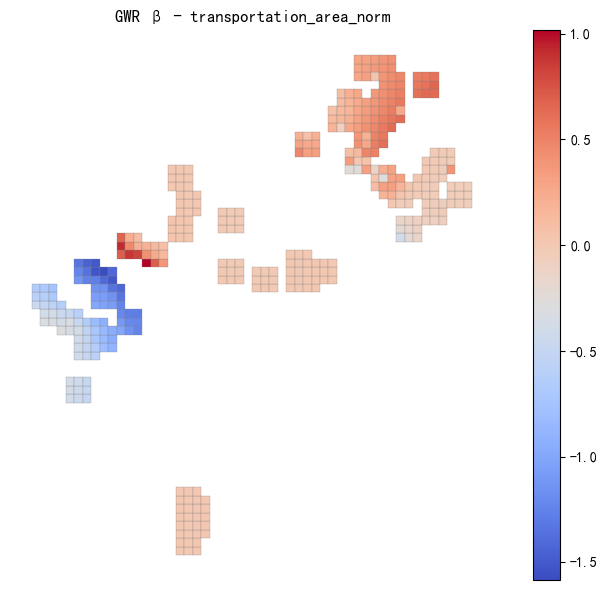

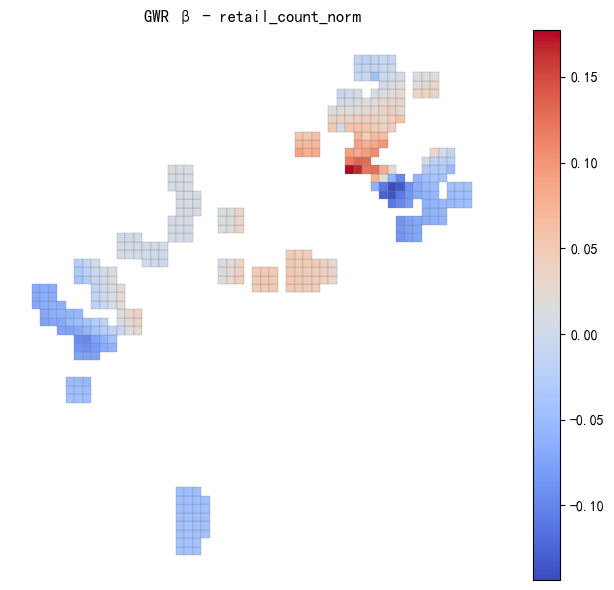

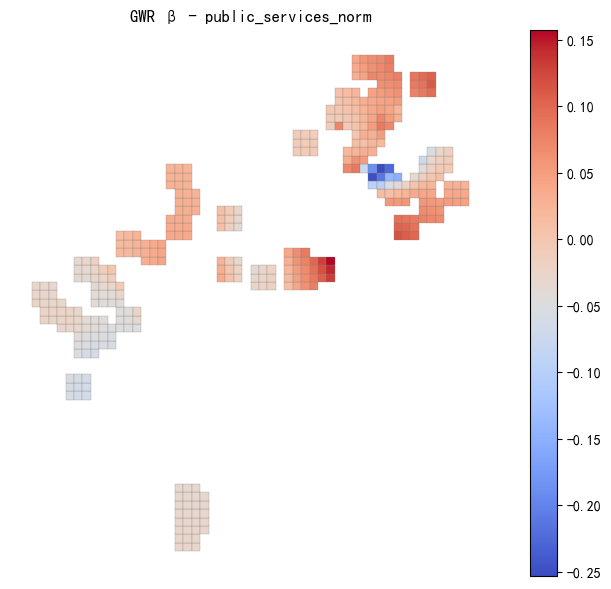

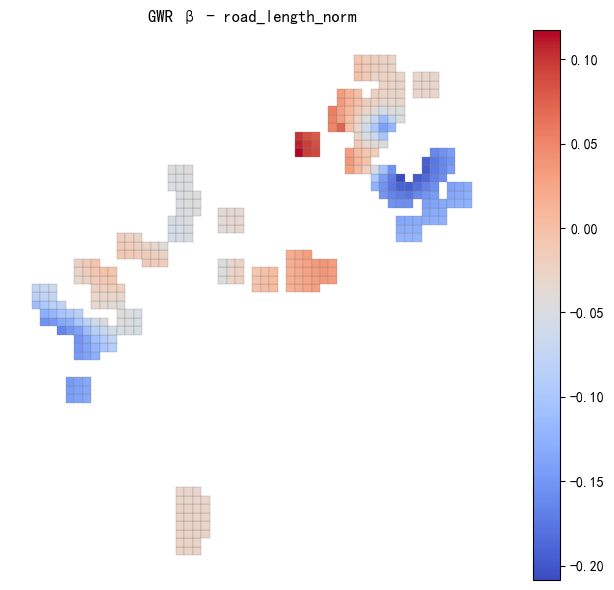

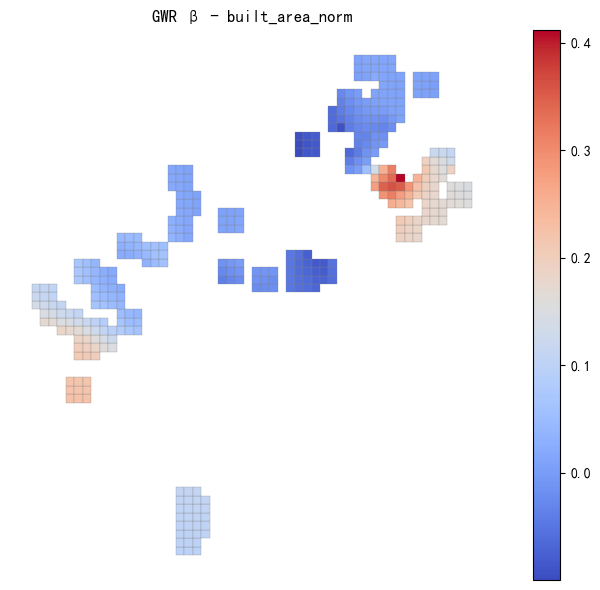

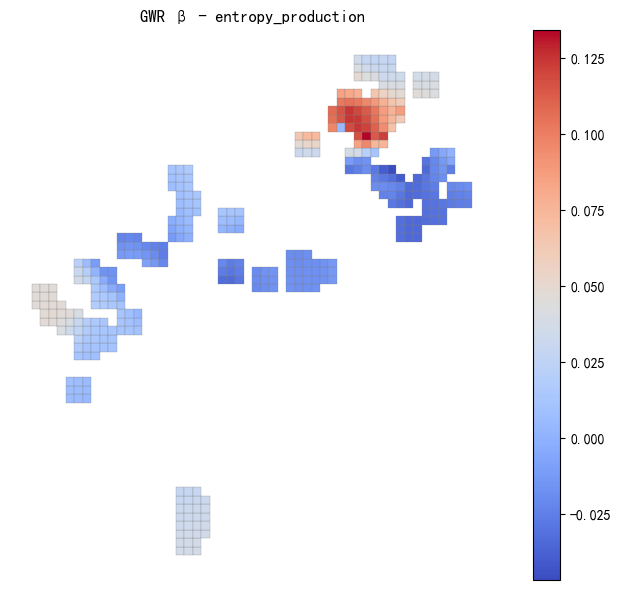

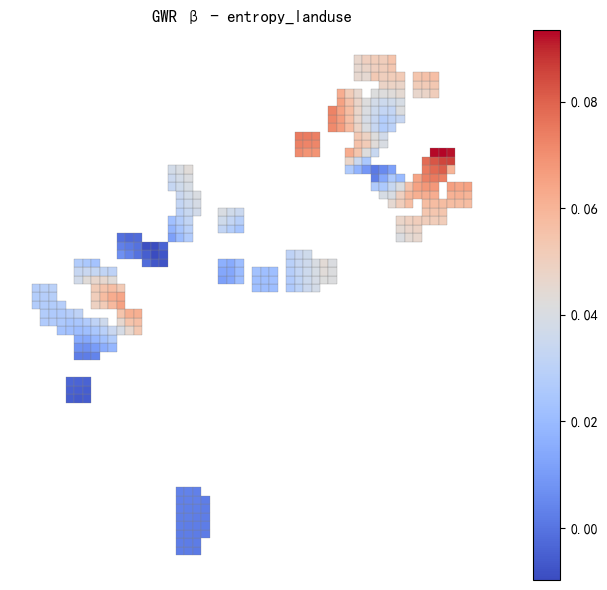

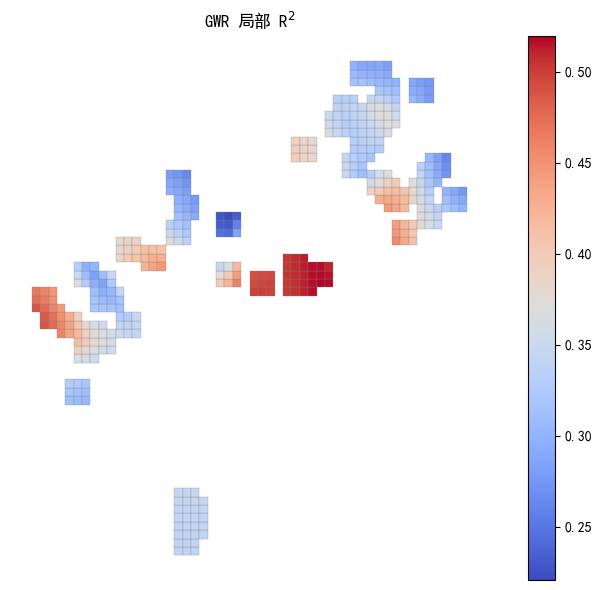

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']  # Èªë‰Ωì
plt.rcParams['axes.unicode_minus'] = False   # Ê≠£Â∏∏ÊòæÁ§∫Ë¥üÂè∑

# ÁîüÊàêÂèòÈáèÂêçÂàóË°®ÔºàÂê´ InterceptÔºâ
coeff_names = ["Intercept"] + list(X_raw.columns)

# ÊèêÂèñÂèÇ‰∏é GWR ÁöÑÁΩëÊ†ºÊï∞ÊçÆ
patches_gwr = patches.loc[X_raw.index].copy()

# Â∞Ü GWR Â±ÄÈÉ®Á≥ªÊï∞ÂÜôÂÖ•ÊØè‰∏™ patch Â±ûÊÄß‰∏≠
for i, var in enumerate(coeff_names):
    patches_gwr[f'beta_{var}'] = gwr_results.params[:, i]

# Ê∑ªÂä†Â±ÄÈÉ® R¬≤
patches_gwr["R2_local"] = gwr_results.localR2



def plot_gwr_result(gdf, column, title, cmap="coolwarm"):
     

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    gdf.plot(column=column, cmap=cmap, legend=True, ax=ax, edgecolor='grey', linewidth=0.2)
    ax.set_title(title)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

for var in X_raw.columns:
    plot_gwr_result(patches_gwr, f'beta_{var}', f"GWR Œ≤ - {var}")

plot_gwr_result(patches_gwr, "R2_local", "GWR Â±ÄÈÉ® R$^2$")


### Â±ÄÈÉ®ÂõûÂΩíÁ≥ªÊï∞ÁªòÂõæ2

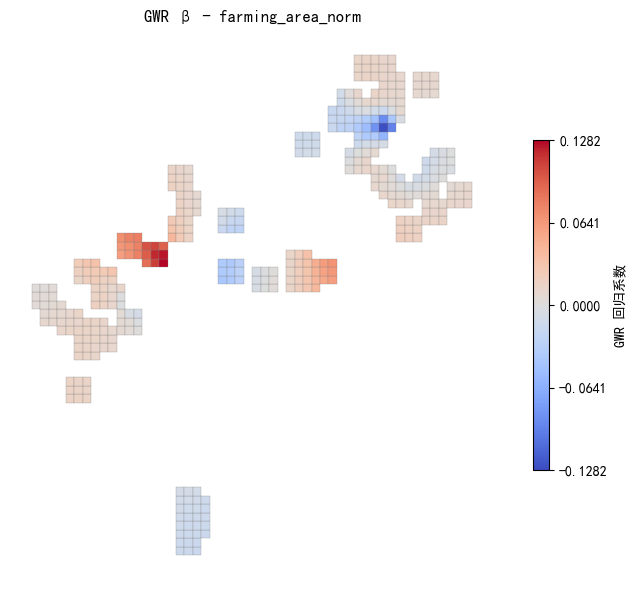

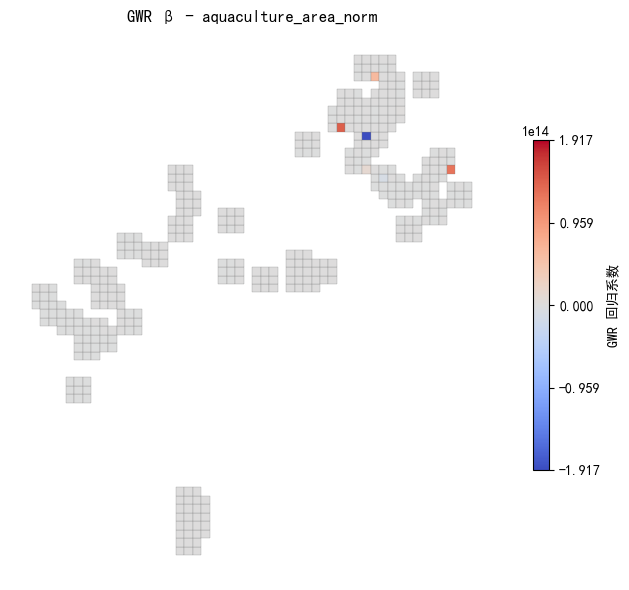

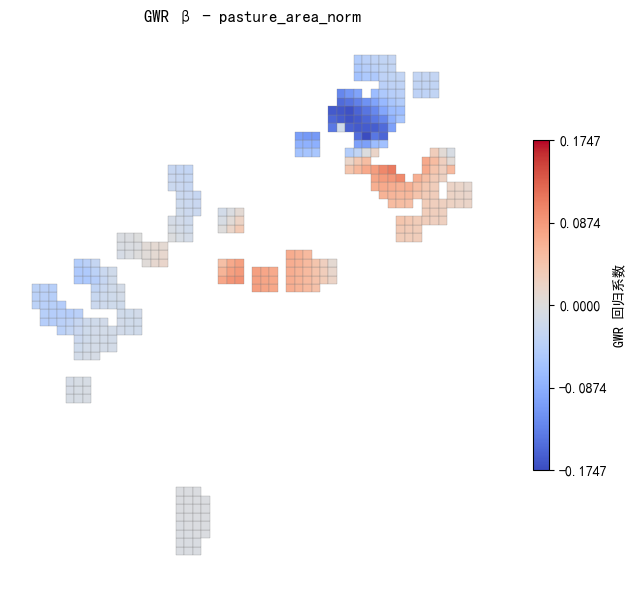

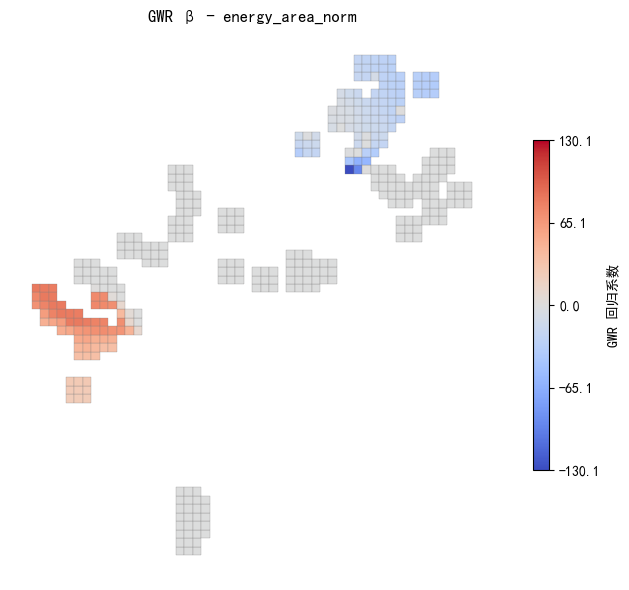

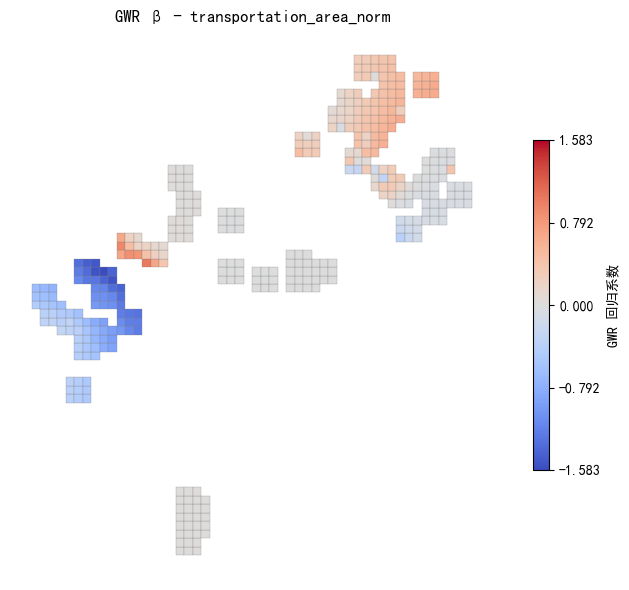

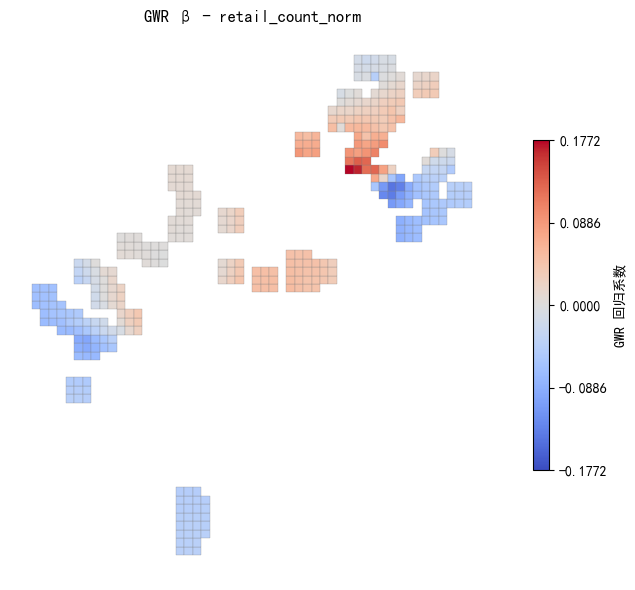

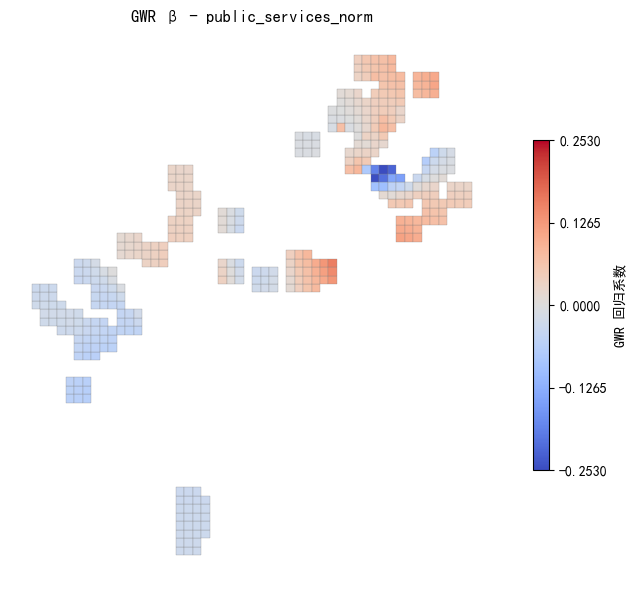

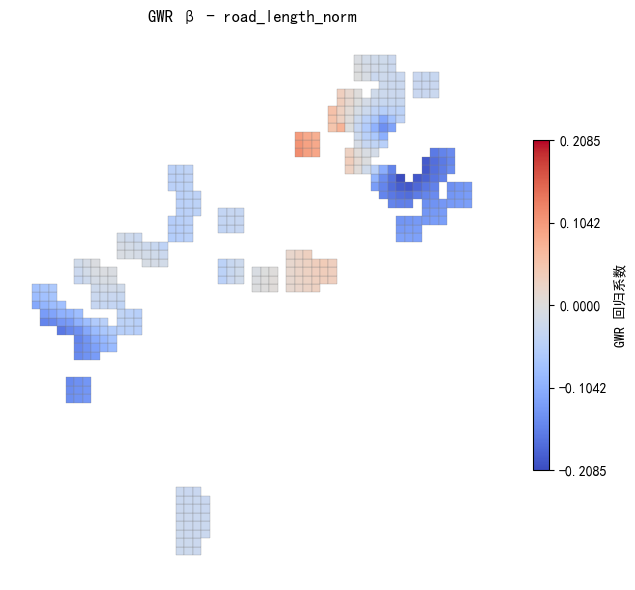

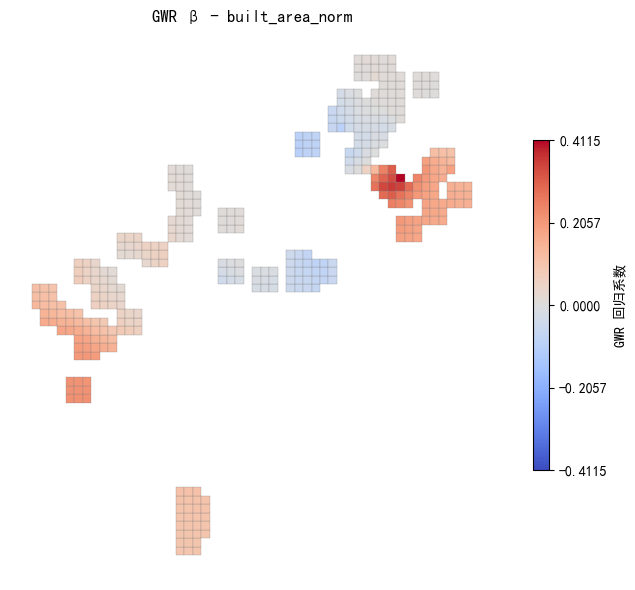

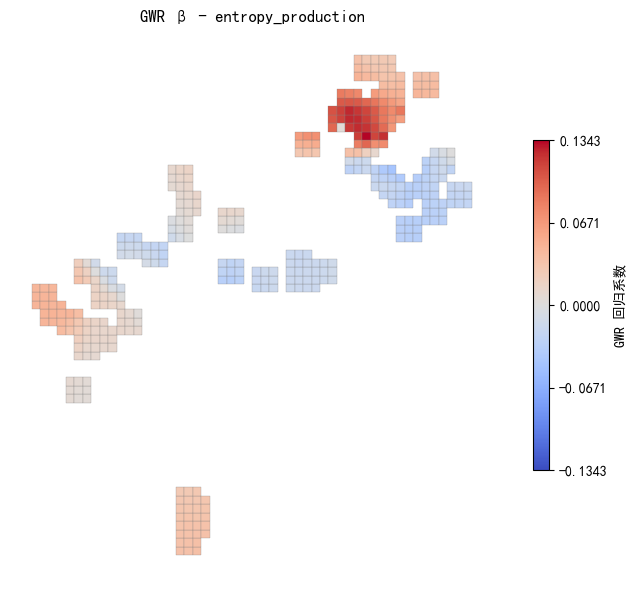

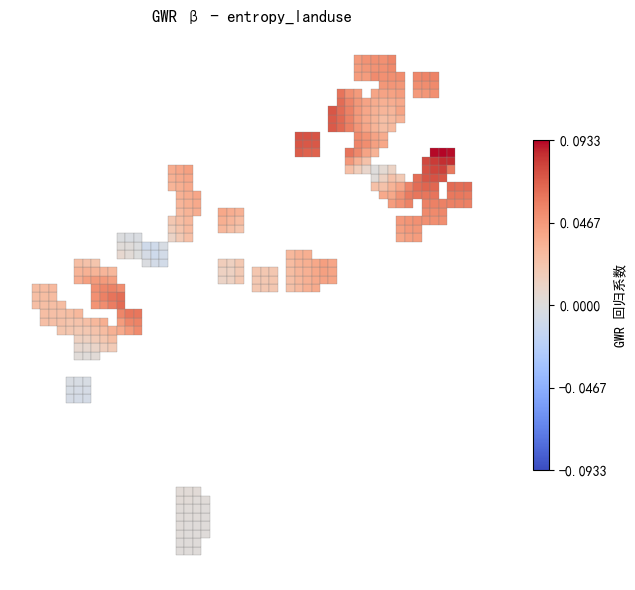

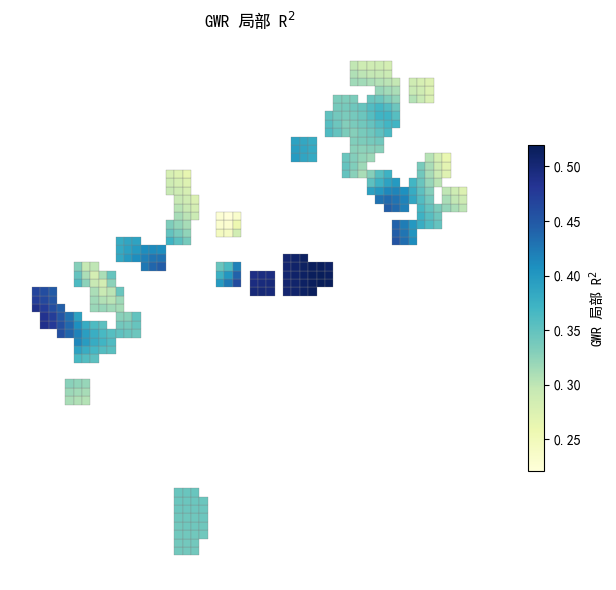

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ‰∏≠Êñá‰∏éË¥üÂè∑ÊîØÊåÅ
plt.rcParams['font.sans-serif'] = ['SimHei']      # ‰∏≠ÊñáÂ≠ó‰ΩìÔºàÈªë‰ΩìÔºâ
plt.rcParams['axes.unicode_minus'] = False        # Ë¥üÂè∑Ê≠£Â∏∏ÊòæÁ§∫

# === 1. ÂáÜÂ§áÂèòÈáèÂêçÂàóË°®ÔºàÂê´ InterceptÔºâ===
coeff_names = ["Intercept"] + list(X_raw.columns)

# === 2. ÊèêÂèñÂèÇ‰∏é GWR ÁöÑÁΩëÊ†ºÊï∞ÊçÆÔºàÊéíÈô§ NaNÔºâ===
patches_gwr = patches.loc[X_raw.index].copy()

# === 3. ÂÜôÂÖ• GWR Ê®°ÂûãËæìÂá∫ÔºàÁ≥ªÊï∞Ôºâ===
for i, var in enumerate(coeff_names):
    patches_gwr[f'beta_{var}'] = gwr_results.params[:, i]

# === 4. ÂÜôÂÖ•Â±ÄÈÉ® R¬≤ ===
patches_gwr["R2_local"] = gwr_results.localR2

# === 5. ÂÆö‰πâÁªòÂõæÂáΩÊï∞ÔºàÊØè‰∏™ÂèòÈáèÁã¨Á´ãËâ≤Â∏¶„ÄÅÂØπÁß∞‰∫é0Ôºâ===
def plot_gwr_result(gdf, column, title, cmap="coolwarm"):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    # ‰øùÊåÅËâ≤Â∏¶ÂØπÁß∞Ôºà‰∏≠ÂøÉ‰∏∫0Ôºâ
    col_data = gdf[column]
    bound = max(abs(col_data.min()), abs(col_data.max()))
    ticks = np.linspace(-bound, bound, 5)

    gdf.plot(
        column=column,
        cmap=cmap,
        ax=ax,
        legend=True,
        vmin=-bound,
        vmax=bound,
        legend_kwds={
            'label': "GWR ÂõûÂΩíÁ≥ªÊï∞",
            'shrink': 0.6,
            'ticks': ticks
        },
        edgecolor='grey',
        linewidth=0.2
    )

    ax.set_title(title)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

# === 6. ÊâπÈáèÁªòÂà∂ÊâÄÊúâÂèòÈáèÁöÑÂ±ÄÈÉ®Á≥ªÊï∞ÁÉ≠ÂäõÂõæ ===
for var in X_raw.columns:
    plot_gwr_result(patches_gwr, f'beta_{var}', f"GWR Œ≤ - {var}")

# === 7. ÂçïÁã¨ÁªòÂà∂Â±ÄÈÉ® R¬≤ ÂõæÔºà‰∏çÂÅöÂØπÁß∞Â§ÑÁêÜÔºâ===
def plot_r2(gdf, column="R2_local"):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    gdf.plot(
        column=column,
        cmap="YlGnBu",
        legend=True,
        ax=ax,
        legend_kwds={'label': "GWR Â±ÄÈÉ® R$^2$", 'shrink': 0.6},
        edgecolor='grey',
        linewidth=0.2
    )
    ax.set_title("GWR Â±ÄÈÉ® R$^2$")
    ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_r2(patches_gwr)


#### Â±ÄÈÉ®ÂõûÂΩíÁ≥ªÊï∞ÁªòÂõæ--‰øùÂ≠òÂõæÁâá

In [31]:
# ÂèØÁºñËæëËæìÂá∫Ë∑ØÂæÑÁöÑ GWR ÂõæÂÉèÂØºÂá∫ËÑöÊú¨
import os
import matplotlib.pyplot as plt
import numpy as np

# ‚úÖ üëâ ‰Ω†Âè™ÈúÄ‰øÆÊîπËøôÈáåÔºö
output_path = r"G:\CODE\UrbanFood\processing_data\img"  # ‚Üê ‰øÆÊîπ‰∏∫‰Ω†Â∏åÊúõÁöÑËæìÂá∫Êñá‰ª∂Â§πË∑ØÂæÑÔºàÂ¶Ç "D:/GWR/ÂõæÂÉè/"Ôºâ
image_format = "png"             # ÂèØÈÄâÔºö"png"„ÄÅ"pdf"„ÄÅ"svg"
dpi = 300                        # ÂõæÂÉèÊ∏ÖÊô∞Â∫¶

# ‚úÖ ÊâßË°åÂØºÂá∫ÂáΩÊï∞
def export_gwr_maps(gdf, X_raw, output_dir, image_format="png", dpi=300):
    """
    ÊâπÈáèÂØºÂá∫ GWR ÁÉ≠ÂäõÂõæÔºàÂèòÈáèÂ±ÄÈÉ®Á≥ªÊï∞ÂíåÂ±ÄÈÉ® R¬≤ÔºâÂà∞ÊåáÂÆöÊñá‰ª∂Â§π
    """
    os.makedirs(output_dir, exist_ok=True)
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

    for var in X_raw.columns:
        column = f"beta_{var}"
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))

        bound = max(abs(gdf[column].min()), abs(gdf[column].max()))
        ticks = np.linspace(-bound, bound, 5)

        gdf.plot(
            column=column,
            cmap="coolwarm",
            ax=ax,
            legend=True,
            vmin=-bound,
            vmax=bound,
            legend_kwds={
                'label': "GWR ÂõûÂΩíÁ≥ªÊï∞",
                'shrink': 0.6,
                'ticks': ticks
            },
            edgecolor='grey',
            linewidth=0.2
        )

        ax.set_title(f"GWR Œ≤ - {var}")
        ax.axis('off')
        plt.tight_layout()

        filename = f"gwr_beta_{var}.{image_format}"
        filepath = os.path.join(output_dir, filename)
        plt.savefig(filepath, dpi=dpi)
        plt.close()

    # ‰øùÂ≠òÂ±ÄÈÉ® R¬≤ Âõæ
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    gdf.plot(
        column="R2_local",
        cmap="YlGnBu",
        ax=ax,
        legend=True,
        legend_kwds={'label': "GWR Â±ÄÈÉ® R$^2$", 'shrink': 0.6},
        edgecolor='grey',
        linewidth=0.2
    )
    ax.set_title("GWR Â±ÄÈÉ® R$^2$")
    ax.axis('off')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"gwr_R2_local.{image_format}"), dpi=dpi)
    plt.close()

    print(f"‚úÖ Â∑≤ÊàêÂäüÂØºÂá∫ {len(X_raw.columns)+1} Âº†ÂõæÂÉèÂà∞Ôºö{output_dir}")

# ‚úÖ Ë∞ÉÁî®ÂáΩÊï∞ÔºàË∑ØÂæÑÊù•Ëá™‰Ω†Â°´ÂÜôÁöÑ output_pathÔºâ
export_gwr_maps(patches_gwr, X_raw, output_dir=output_path, image_format=image_format, dpi=dpi)


‚úÖ Â∑≤ÊàêÂäüÂØºÂá∫ 12 Âº†ÂõæÂÉèÂà∞ÔºöG:\CODE\UrbanFood\processing_data\img


### Êñ∞Â¢ûÂäüËÉΩÔºöËØÜÂà´ÊØè‰∏™ÂèòÈáèÁöÑÊòæËëóÊÄßÂå∫ÂüüÂπ∂ÁªòÂõæ

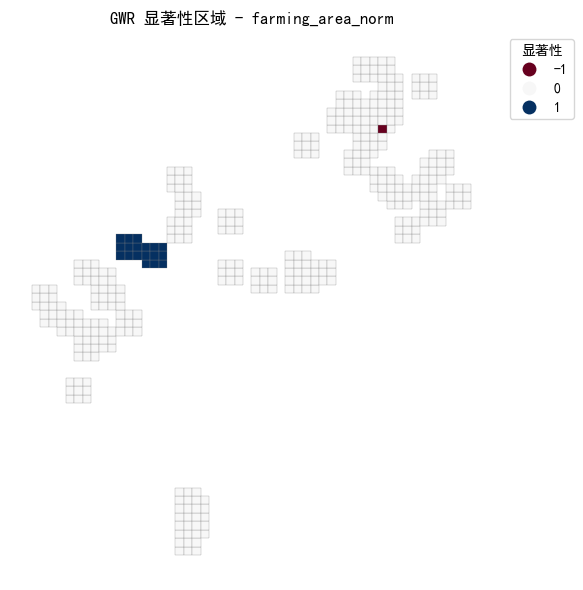

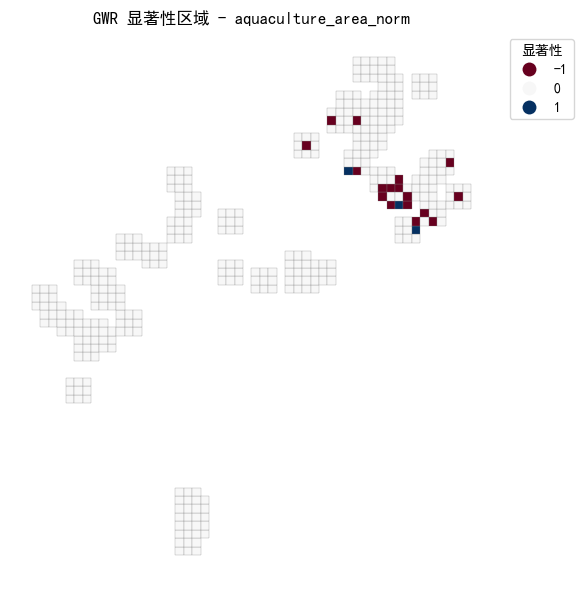

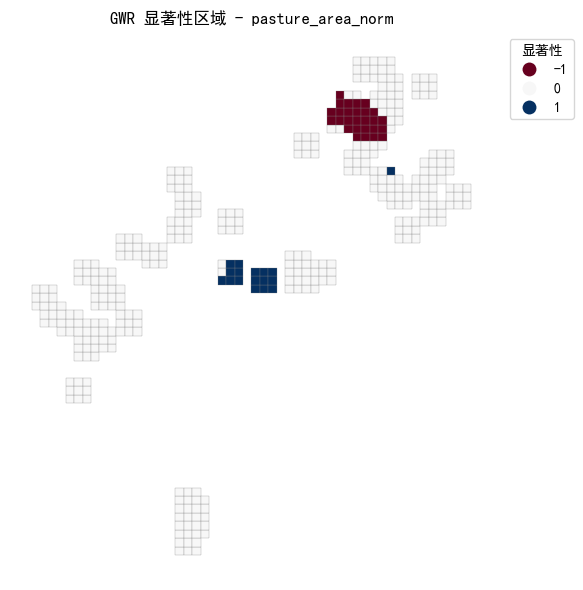

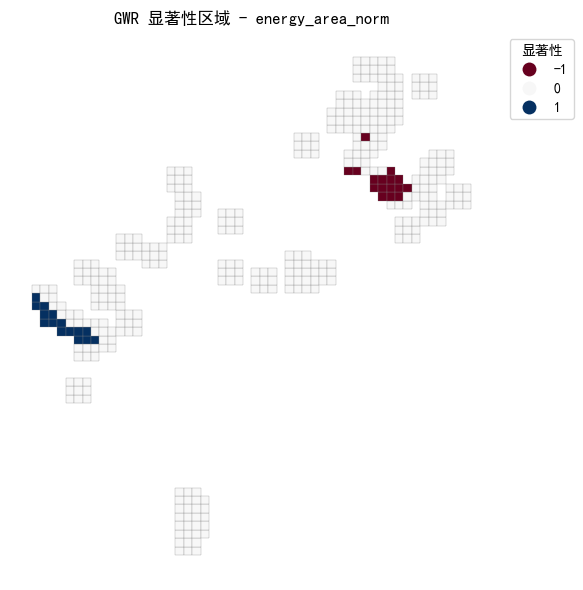

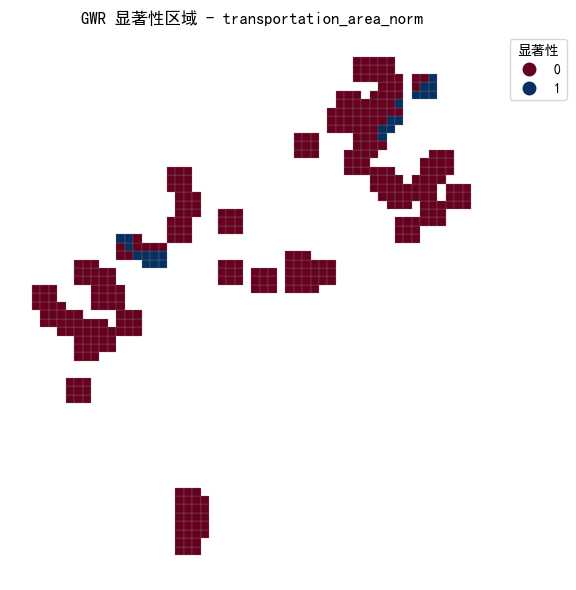

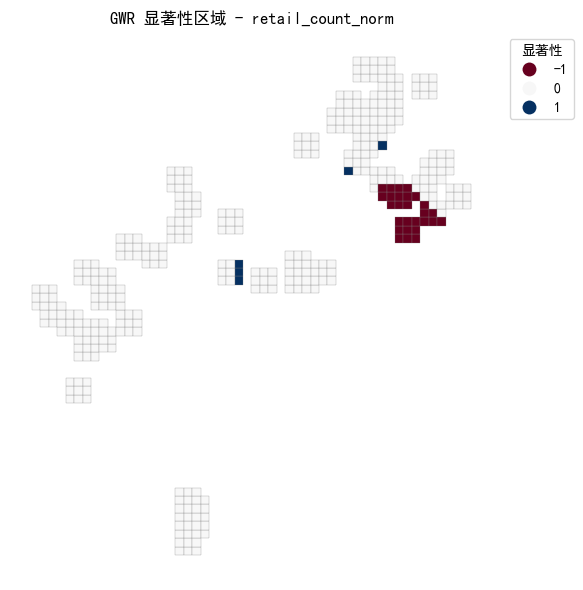

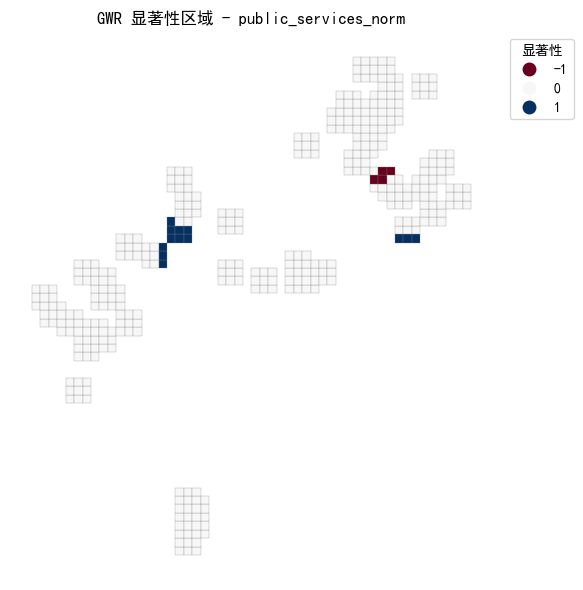

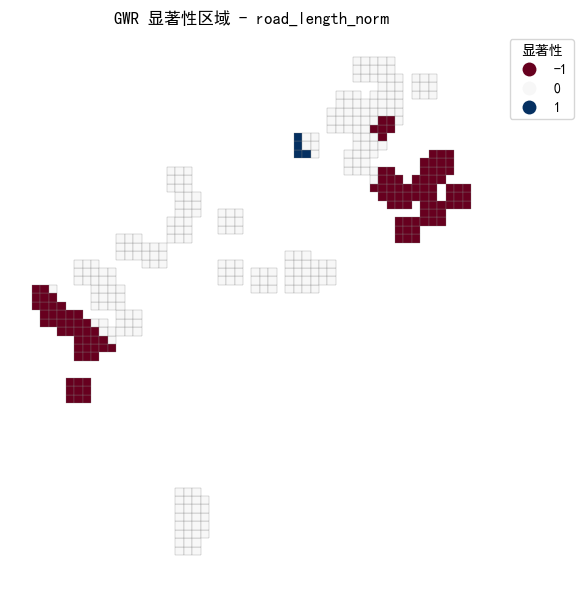

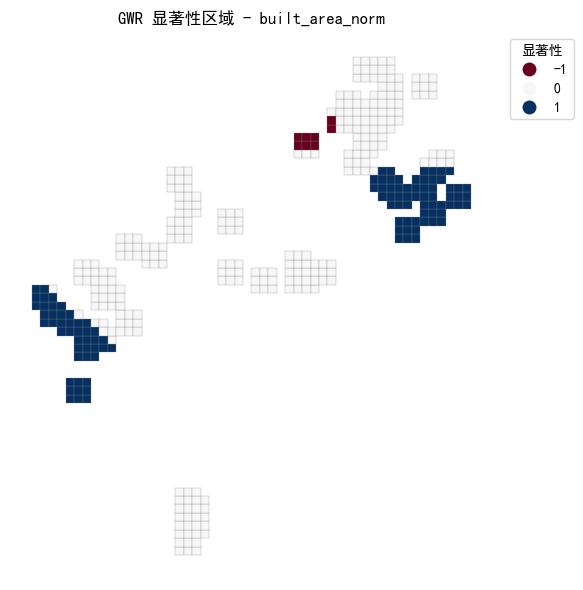

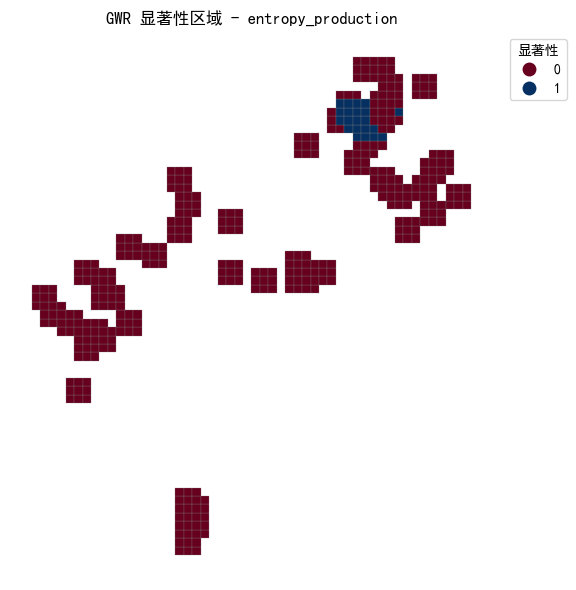

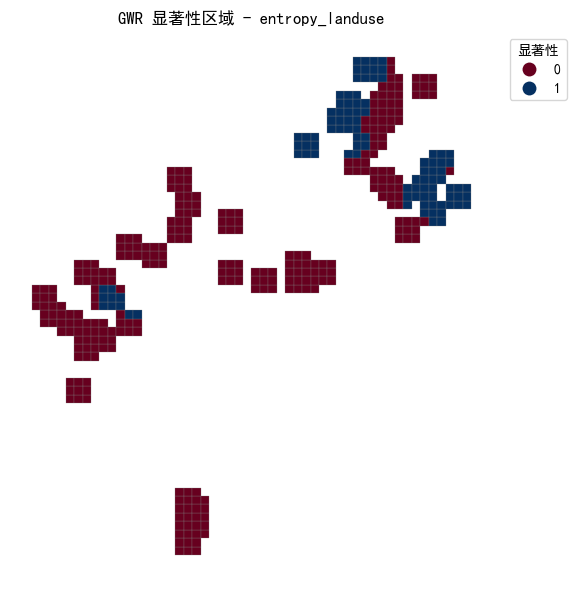

In [26]:
#Êñ∞Â¢ûÂäüËÉΩÔºöËØÜÂà´ÊØè‰∏™ÂèòÈáèÁöÑÊòæËëóÊÄßÂå∫ÂüüÂπ∂ÁªòÂõæÔºõ  Âà§Êñ≠ÊØè‰∏™ÁΩëÊ†º‰∏≠ÔºåÂèòÈáè Œ≤ Á≥ªÊï∞ÊòØÂê¶Âú®ÁªüËÆ°‰∏äÊòæËëóÔºõ
# ‰ΩøÁî® 95% ÁΩÆ‰ø°Âå∫Èó¥Ôºà¬±1.96 √ó Ê†áÂáÜËØØÔºâËøõË°åÂà§Êñ≠Ôºõ
# ËæìÂá∫ÊòæËëóÊÄßÁ±ªÂà´Ôºö1 = ÊòæËëóÊ≠£ÂêëÂΩ±ÂìçÔºõ-1 = ÊòæËëóË¥üÂêëÂΩ±ÂìçÔºõ0 = ‰∏çÊòæËëó
# Ëá™Âä®ÁªòÂõæÂ±ïÁ§∫ÊØè‰∏™ÂèòÈáèÁöÑÁ©∫Èó¥ÊòæËëóÊÄßÂå∫Âüü„ÄÇ
# === 8. ÊòæËëóÊÄßÂå∫ÂüüËØÜÂà´‰∏éÂèØËßÜÂåñ ===

def plot_significance_zones(gdf, gwr_results, variable_names, z=1.96):
    """
    ËØÜÂà´ÊØè‰∏™ÂèòÈáèÂú®Á©∫Èó¥‰∏äÁöÑÊòæËëóÂå∫ÂüüÔºåÂπ∂ÁªòÂõæÔºà¬±z¬∑SEÔºâ
    """
    beta = gwr_results.params
    se = gwr_results.bse

    for i, var in enumerate(variable_names):
        idx = i + 1  # Á¨¨0Âàó‰∏∫Intercept
        coef = beta[:, idx]
        stderr = se[:, idx]

        lower = coef - z * stderr
        upper = coef + z * stderr

        # Âà§Êñ≠ÊòæËëóÊÄß
        sig = np.where(lower > 0, 1, np.where(upper < 0, -1, 0))
        sig_col = f"sig_{var}"
        gdf[sig_col] = sig

        # ÁªòÂõæ
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))
        cmap = plt.get_cmap("RdBu", 3)  # Á∫¢ = Ê≠£ÂêëÊòæËëó, Ëìù = Ë¥üÂêëÊòæËëó, ÁÅ∞ = ‰∏çÊòæËëó
        gdf.plot(
    column=sig_col,
    cmap=cmap,
    ax=ax,
    legend=True,
    categorical=True,
    edgecolor='grey',
    linewidth=0.2,
    legend_kwds={
        'loc': 'upper left',           # Âõæ‰æãÂú®Â∑¶‰∏äËßí
        'bbox_to_anchor': (1.02, 1),   # ÂêëÂè≥ÂÅèÁßªÂõæÂ§ñ
        'title': 'ÊòæËëóÊÄß',              # Âõæ‰æãÊ†áÈ¢ò
        'fontsize': 10
    }
)

        
        ax.set_title(f"GWR ÊòæËëóÊÄßÂå∫Âüü - {var}")
        ax.axis('off')
        plt.tight_layout()
        plt.show()

# === Ë∞ÉÁî®ÔºöÂØπÊâÄÊúâÂèòÈáèÁªòÂà∂ÊòæËëóÊÄßÂõæ ===
plot_significance_zones(patches_gwr, gwr_results, list(X_raw.columns))

# üî¥ Á∫¢Ëâ≤ÔºöËØ•ÂèòÈáèÂú®ËØ•ÁΩëÊ†º ÊòæËëóÊ≠£ÂêëÂΩ±ÂìçÂ∑•ÂéÇÊï∞ÈáèÔºõ
# üîµ ËìùËâ≤ÔºöÊòæËëóË¥üÂêëÂΩ±ÂìçÔºõ
# ‚ö™ ÁÅ∞Ëâ≤ÔºöÂΩ±Âìç‰∏çÊòæËëó„ÄÇ